<a href="https://colab.research.google.com/github/ThanabordeeN/AI_mini_Project/blob/main/ConV%26MaxPooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd


Cov + MaxPooling

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
his_trained=model.fit(train_images, train_labels, epochs=5,batch_size=64,validation_data=(test_images, test_labels))


Text(0.5, 1.0, 'Model validation curve')

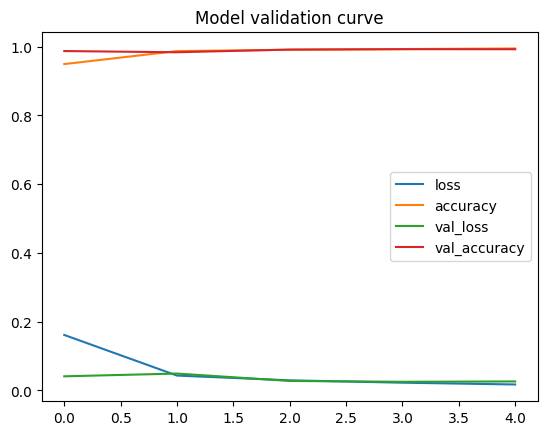

In [ ]:
pd.DataFrame(his_trained.history).plot()
plt.title("Model validation curve")

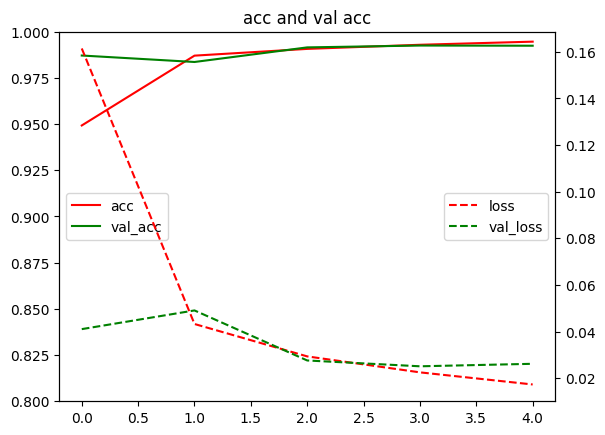

In [ ]:
fig=plt.figure(5)
ax1=fig.gca()
ax1.set_title('acc and val acc')
ax1.plot(his_trained.history['accuracy'],'r',label = 'acc')
ax1.plot(his_trained.history['val_accuracy'],'g',label = 'val_acc')
ax1.legend(loc='center left')
ax1.set_ylim(0.8,1)

ax2=ax1.twinx()
ax2.plot(his_trained.history['loss'],'r--',label = 'loss')
ax2.plot(his_trained.history['val_loss'],'g--',label = 'val_loss')
ax2.legend(loc='center right')
#ax2.set_ylim(0.8,1)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%ls

gdrive/  sample_data/


In [ ]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
!unzip -qq dogcat.zip

replace test_set/test_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os, shutil, pathlib
original_dir = r'/content/gdrive/MyDrive/training_set/training_set'
new_base_dir = pathlib.Path("cats_vs_dogs_small")
def make_subset(subset_name, start_index, end_index):
  for category in ("cats","dogs"):
    dir = new_base_dir/subset_name/category
    os.makedirs(dir)
    fnames = ["%s.%d.jpg"%(category[:len(category)- 1], i) for i in range(start_index, end_index)]
    for k in fnames:
      try:
        shutil.copyfile(src = os.path.join(original_dir, category, k), dst = dir/k)
      except FileNotFoundError:
        pass

In [ ]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)


In [ ]:
!rm -rf cats_vs_dogs_small


In [ ]:
IMG_SIZE = 180

data_augmentation = keras.Sequential(
[ layers.RandomFlip("horizontal"),layers.RandomRotation(0.1),layers.RandomZoom(0.2),layers.Resizing(IMG_SIZE, IMG_SIZE),  layers.Rescaling(1./255)

])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)#Normalization
x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 8)       224       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 16)       0         
 2D)                                                       

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(new_base_dir / "train",
image_size=(180, 180),
batch_size=32)
validation_dataset = image_dataset_from_directory(
new_base_dir / "validation",
image_size=(180, 180),
batch_size=32)
test_dataset = image_dataset_from_directory(
new_base_dir / "test",
image_size=(180, 180),
batch_size=32)

Found 1998 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
modelll = model.fit(train_dataset,epochs=25, batch_size = 32 ,validation_data=validation_dataset,shuffle = True)

Epoch 1/25
63/63 [==============================] - 454s 6s/step - loss: 0.6926 - accuracy: 0.5175 - val_loss: 0.6910 - val_accuracy: 0.4990
Epoch 2/25
63/63 [==============================] - 10s 145ms/step - loss: 0.6860 - accuracy: 0.5380 - val_loss: 0.6730 - val_accuracy: 0.5870
Epoch 3/25
63/63 [==============================] - 6s 93ms/step - loss: 0.6612 - accuracy: 0.6036 - val_loss: 0.6453 - val_accuracy: 0.6150
Epoch 4/25
63/63 [==============================] - 6s 92ms/step - loss: 0.6366 - accuracy: 0.6261 - val_loss: 0.6404 - val_accuracy: 0.6230
Epoch 5/25
63/63 [==============================] - 10s 146ms/step - loss: 0.6294 - accuracy: 0.6386 - val_loss: 0.6358 - val_accuracy: 0.6290
Epoch 6/25
63/63 [==============================] - 6s 92ms/step - loss: 0.6294 - accuracy: 0.6431 - val_loss: 0.6142 - val_accuracy: 0.6620
Epoch 7/25
63/63 [==============================] - 7s 113ms/step - loss: 0.6075 - accuracy: 0.6557 - val_loss: 0.6058 - val_accuracy: 0.6670
Epoch 8/

In [ ]:
pd.DataFrame(modelll.history).plot()
plt.title("Model validation curve")

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(modelll.history['accuracy'])
plt.plot(modelll.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(modelll.history['loss'])
plt.plot(modelll.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save("catdog.h5")